###Описание данных:  

Синтетический датасет, который помогает попрактиковаться в ABC-XYZ-анализе.  


`Item_ID` - идентификатор товара  
`Item_Name` - название товара  
`Category` - категория товара  
`Jan_Demand`, ..., `Dec_Demand` - спрос на товар за соответсвующий месяц  
`Total_Annual_Units` - суммарный годовой спрос на товар  
`Price_Per_Unit` - цена за единицу товара  
`Total_Sales_Value` - общая сумма продаж товара  

Источник: [kaggle.com](https://kaggle.com)

### Цели исследования:  
- Провести предобработку данных, если она нужна
- Изучить категории товаров, которые приносят наибольшую прибыль
- Составить топ-5 товаров, которые приносят наибольшую прибыль
- Изучить динамику спроса и прибыли по месяцам
- Провести АВС-XYZ-анализ

### Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/abc_xyz_analysis/abc_xyz_dataset.csv')

In [3]:
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [5]:
print(f'Количество пропущенных значений во всем датафрейме: {df.isna().sum().sum()}')
print(f'Количество полных явных дубликатов: {df.duplicated().sum()}')

Количество пропущенных значений во всем датафрейме: 0
Количество полных явных дубликатов: 0


In [6]:
sales_by_category = df.groupby('Category')['Total_Sales_Value'].agg(count='count', total_revenue='sum').reset_index()
sales_by_category['category_share'] = round(sales_by_category['total_revenue'] / sales_by_category['total_revenue'].sum() * 100, 2)
sales_by_category.sort_values(by='total_revenue', ascending=False)

,Category,count,total_revenue,category_share
2,Grocery,402,911737236,85.03
0,Apparel,216,99381360,9.27
1,Electronics,193,25081150,2.34
4,Toys,89,21945148,2.05
3,Home & Kitchen,100,14143006,1.32


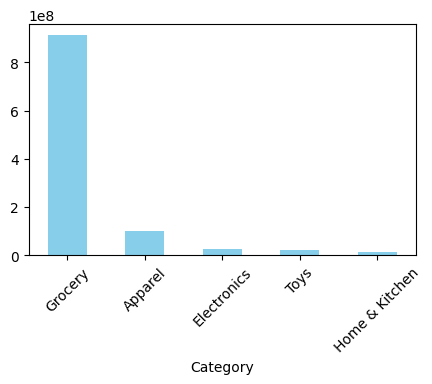

In [7]:
sales_by_category.sort_values(by='total_revenue', ascending=False).plot.bar(x='Category',
                                                                            y='total_revenue',
                                                                            color='skyblue',
                                                                            rot=45,
                                                                            figsize=(5, 3),
                                                                            legend=False)
plt.show()

В данных представлены товары пяти категорий.  
- Больше всего продаж приходится на категорию Grocery (продукты питания), эта категория составляет 85% от всех продаж.
- 10% приходится на категорию Apparel (одежда)

- На электронику и игрушки приходится около 2%
- На категорию Дом и Кухня приходится меньше всего продаж - 1%

Составим топ-5 самых продаваемых товаров

In [8]:
top_5 = df[['Item_Name', 'Category', 'Total_Sales_Value']].sort_values(by='Total_Sales_Value', ascending=False).head()
top_5

,Item_Name,Category,Total_Sales_Value
924,Ten And,Grocery,59462000
511,Radio Race,Grocery,47606000
521,Pattern Book,Grocery,37136000
394,Animal Key,Grocery,29804500
168,Material Vote,Grocery,28431000


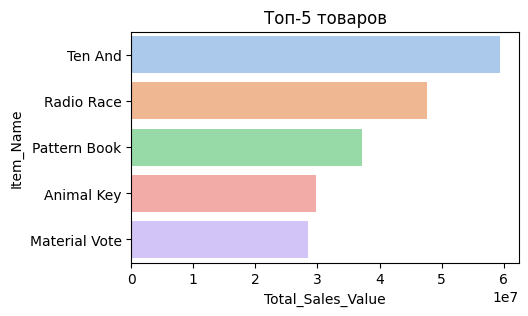

In [9]:
plt.figure(figsize=(5, 3))
sns.barplot(data=top_5,
            x='Total_Sales_Value',
            y='Item_Name',
            palette='pastel',
            hue='Item_Name')
plt.title('Топ-5 товаров')
plt.show()

Изучим динамику спроса и продаж товаров по месяцам

In [10]:
df1 = df.copy()

In [11]:
months_demand = [col for col in df.columns if '_Demand' in col]
months = [month.split('_')[0] for month in months_demand]

for month in months:
    df1[month + '_Revenue'] = df1[month + '_Demand'] * df1['Price_Per_Unit']

months_revenue = [col for col in df1.columns if '_Revenue' in col]

monthly_avg_demand = df1[months_demand].mean()
monthly_avg_revenue = df1[months_revenue].mean()

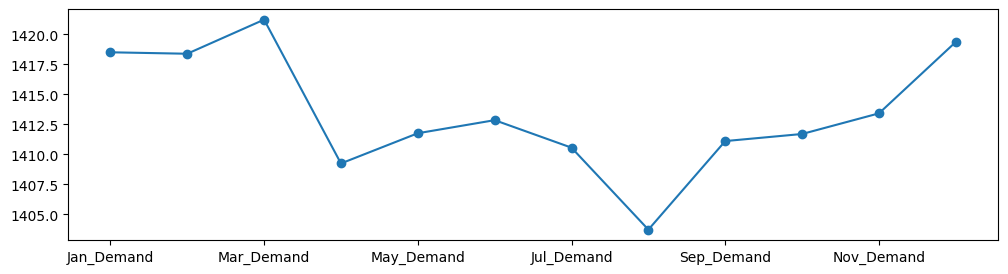

In [12]:
plt.figure(figsize=(12,3))
monthly_avg_demand.plot(marker='o')
plt.show()

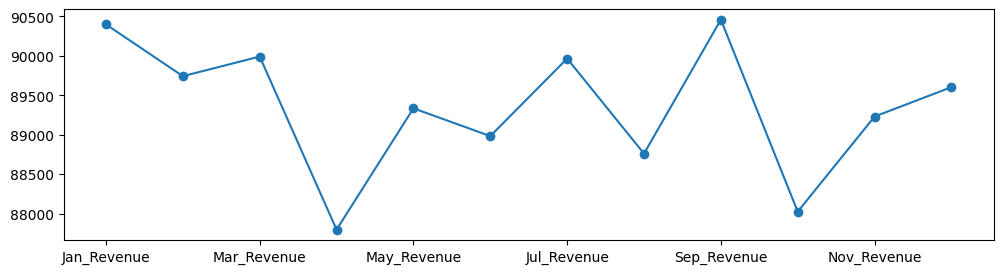

In [13]:
plt.figure(figsize=(12,3))
monthly_avg_revenue.plot(marker='o')
plt.show()

Из построенных графиков видно, что наибольшее снижение выручки наблюдается в апреле и октябре. В апреле снижение выручки согласуется со снижением спроса, но в октябре наблюдается резкое снижение выручки на фоне небольшого роста спроса. Тоже самое можно сказать про июнь, наблюдается снижение выручки на фоне роста спроса. Максимума выручка достигает в сентябре.

### ABC-XYZ анализ

**АВС-анализ**:
- Товары группы А приносят 80% прибыли,
- Товары группы В приносят 15% прибыли,
- Товары группы С принсят 5% прибыли.  

**XYZ-анализ**:
- Товары группы Х имеют стабильный спрос, коэффициент вариации меньше 10%
- Товары группы Y имеют умеренно стабильный спрос, коэффициент вариации от 10 до 25%
- Товары группы Z имеют нестабильный и волатильный спрос, коэффициент вариации больше 25%.  

Где коэффициент вариации - это отношение стандартного отклонения к среднему:
$$CV=\frac{\sigma}{\mu}$$


In [14]:
df1 = df1.sort_values(by='Total_Sales_Value', ascending=False)

# Подсчет кумулятивной доли товаров
df1['cum_share'] = round(df1['Total_Sales_Value'].cumsum() / df1['Total_Sales_Value'].sum() * 100, 2)
# Присваивание ABC-класса товарам
df1['ABC_class'] = np.where(df1['cum_share'] <= 80, 'A',
                            np.where(df1['cum_share'] <= 95, 'B', 'C'))

# Подсчет среднего и станартного отклонения по месяцам для каждого товара
df1['avg_demand'] = df1[months_demand].mean(axis=1)
df1['std_demand'] = df1[months_demand].std(axis=1)
# Подсчет коэффициента вариации
df1['cv'] = round(df1['std_demand'] / df1['avg_demand'] * 100, 2)
# Присваивание XYZ-класса товарам
df1['XYZ_class'] = np.where(df1['cv'] < 10, 'X',
                            np.where(df1['cv'] <= 25, 'Y', 'Z'))

# Присваивание комбинированного класса ABC-XYZ
df1['Combined_class'] = df1['ABC_class'] + df1['XYZ_class']

In [15]:
df_final = df1[['Item_ID', 'Item_Name', 'Category', 'cum_share', 'ABC_class', 'cv', 'XYZ_class', 'Combined_class']]

In [16]:
# Посчитаем количество и долю товаров всех классов
df_counts_class = df_final['Combined_class'].value_counts().reset_index()
df_counts_class['percent'] = round(df_counts_class['count'] / df_counts_class['count'].sum() * 100, 2)
df_counts_class

,Combined_class,count,percent
0,CX,458,45.8
1,CY,157,15.7
2,CZ,128,12.8
3,BX,114,11.4
4,AX,65,6.5
5,BY,40,4.0
6,AY,19,1.9
7,BZ,16,1.6
8,AZ,3,0.3


**Выводы:**  
- Больше всего товаров — в группе CX: они недорогие, но стабильно продаются, за ними можно почти не следить.  
- Самые важные для бизнеса — AX, их нужно всегда держать в наличии.  
- Группы CY и CZ малополезны и продаются нестабильно — их можно сокращать или закупать по необходимости.  
- Товары AZ редкие и рискованные — для них нужен отдельный контроль и продуманное пополнение.  




